In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 40.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ADF Test Statistic: -17.640993301302068
p-value: 3.7589873003265055e-30
Iteration:      1,   Func. Count:      6,   Neg. LLF: 21087316.72337524
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3024642.89575552
Iteration:      3,   Func. Count:     28,   Neg. LLF: 94492.7426678081
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1514.2783889014227
Iteration:      5,   Func. Count:     43,   Neg. LLF: -1116.7393964024707
Iteration:      6,   Func. Count:     50,   Neg. LLF: -1567.3930129280204
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1567.129004918357
Iteration:      8,   Func. Count:     62,   Neg. LLF: -1555.0979478106321
Iteration:      9,   Func. Count:     68,   Neg. LLF: -1597.530191378023
Iteration:     10,   Func. Count:     73,   Neg. LLF: -1597.041056561254
Iteration:     11,   Func. Count:     79,   Neg. LLF: -1597.6053888614438
Iteration:     12,   Func. Count:     84,   Neg. LLF: -1597.6163913330124
Iteration:     13,   Func. Count:     89,   Neg. LL

/opt/conda/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006425. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


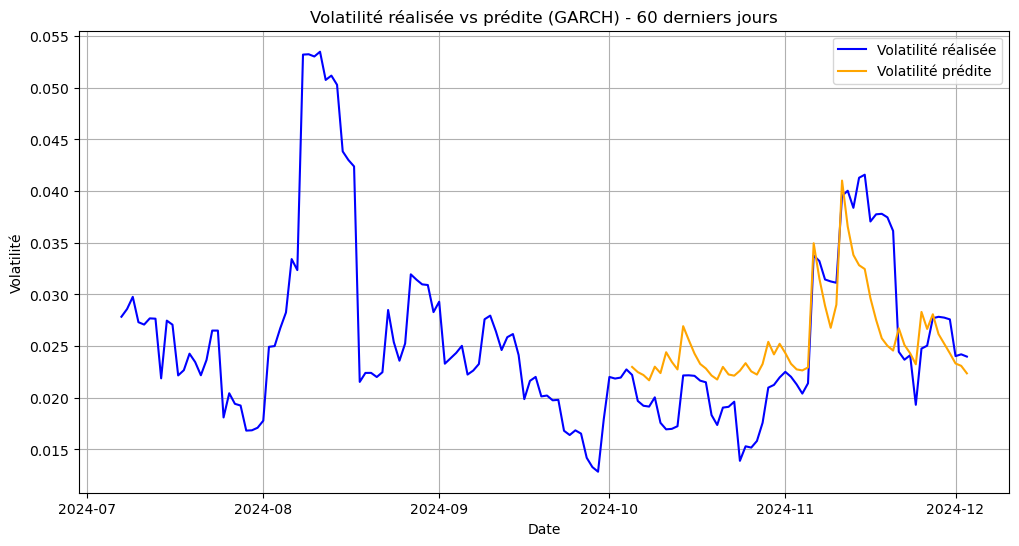

In [17]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('BTCUSDT_daily_2023.csv')  # Remplacez par votre fichier
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Calculer les rendements logarithmiques
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data = data.dropna()

# Vérification de stationnarité (ADF Test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['returns'])
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Ajuster un modèle GARCH(1, 1)
model = arch_model(data['returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit()
print(garch_fit.summary())

# Prédictions de volatilité pour les 60 derniers jours
last_60_returns = data['returns'][-60:]
forecast = garch_fit.forecast(horizon=1, start=last_60_returns.index[0])
data['predicted_volatility'] = np.nan
data.loc[forecast.variance.index, 'predicted_volatility'] = np.sqrt(forecast.variance.values[-60:, 0])

# Calculer la volatilité réalisée pour comparaison
data['realized_volatility'] = data['returns'].rolling(window=10).std()

# Extraire les 60 derniers jours
data_60_days = data.iloc[-60:]
data_nor = data.iloc[-150:]

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(data_nor.index, data_nor['realized_volatility'], label="Volatilité réalisée", color='blue')
plt.plot(data_60_days.index, data_60_days['predicted_volatility'], label="Volatilité prédite", color='orange')
plt.title("Volatilité réalisée vs prédite (GARCH) - 60 derniers jours")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extraire les 60 derniers jours de volatilité réalisée et prédite
realized_volatility = data_60_days['realized_volatility'].dropna()
predicted_volatility = data_60_days['predicted_volatility'].dropna()

# Assurez-vous que les indices correspondent
realized_volatility = realized_volatility.loc[predicted_volatility.index]

# Calculer les métriques
mse = mean_squared_error(realized_volatility, predicted_volatility)
rmse = np.sqrt(mse)
mae = mean_absolute_error(realized_volatility, predicted_volatility)
r2 = r2_score(realized_volatility, predicted_volatility)

# Afficher les résultats
print("Évaluation des prédictions de volatilité :")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Évaluation des prédictions de volatilité :
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0050
Mean Absolute Error (MAE): 0.0040
R² Score: 0.5622


ADF Test Statistic: -17.640993301302068
p-value: 3.7589873003265055e-30
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2600.0063158533676
Iteration:      2,   Func. Count:     14,   Neg. LLF: 733670.6774653645
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1058.80386374621
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1009.3075421443268
Iteration:      5,   Func. Count:     35,   Neg. LLF: 985.3254339235216
Iteration:      6,   Func. Count:     41,   Neg. LLF: 982.3372862308306
Iteration:      7,   Func. Count:     46,   Neg. LLF: 982.2719566116996
Iteration:      8,   Func. Count:     51,   Neg. LLF: 982.2626259037983
Iteration:      9,   Func. Count:     56,   Neg. LLF: 982.2600698726044
Iteration:     10,   Func. Count:     61,   Neg. LLF: 982.2600119872529
Iteration:     11,   Func. Count:     66,   Neg. LLF: 982.2600040575386
Iteration:     12,   Func. Count:     71,   Neg. LLF: 982.2599992560426
Iteration:     13,   Func. Count:     75,   Neg. LLF: 982.25999

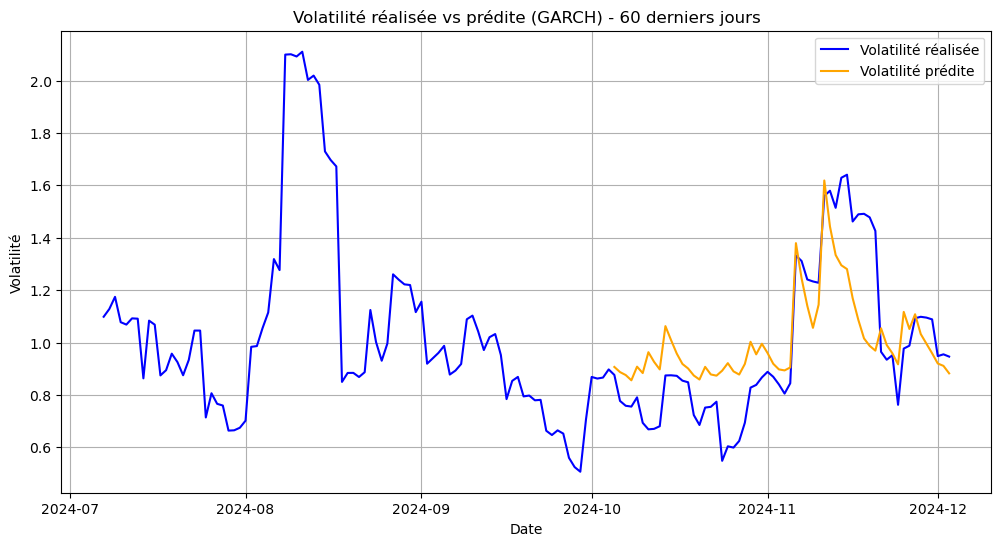

In [28]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Charger les données
data = pd.read_csv('BTCUSDT_daily_2023.csv')  # Remplacez par votre fichier
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Calculer les rendements logarithmiques
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data = data.dropna()

# Vérification de stationnarité (ADF Test)
adf_test = adfuller(data['returns'])
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Mise à l'échelle des rendements
scaler = StandardScaler()
data['scaled_returns'] = scaler.fit_transform(data['returns'].values.reshape(-1, 1))

# Ajuster un modèle GARCH(1, 1) sur les rendements mis à l'échelle
model = arch_model(data['scaled_returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit()
print(garch_fit.summary())

# Prédictions de volatilité pour les 60 derniers jours
last_60_returns = data['scaled_returns'][-60:]
forecast = garch_fit.forecast(horizon=1, start=last_60_returns.index[0])
data['predicted_volatility_scaled'] = np.nan
data.loc[forecast.variance.index, 'predicted_volatility_scaled'] = np.sqrt(forecast.variance.values[-60:, 0])

# Inversion de l'échelle pour revenir à l'échelle d'origine
#data['predicted_volatility'] = scaler.inverse_transform(
#    data['predicted_volatility_scaled'].values.reshape(-1, 1)
#)

# Calculer la volatilité réalisée pour comparaison
data['realized_volatility'] = data['scaled_returns'].rolling(window=10).std()

# Extraire les données pour la visualisation
data_60_days = data.iloc[-60:]
data_nor = data.iloc[-150:]

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(data_nor.index, data_nor['realized_volatility'], label="Volatilité réalisée", color='blue')
plt.plot(data_60_days.index, data_60_days['predicted_volatility_scaled'], label="Volatilité prédite", color='orange')
plt.title("Volatilité réalisée vs prédite (GARCH) - 60 derniers jours")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extraire les 60 derniers jours de volatilité réalisée et prédite
realized_volatility = data_60_days['realized_volatility'].dropna()
predicted_volatility = data_60_days['predicted_volatility_scaled'].dropna()

# Assurez-vous que les indices correspondent
realized_volatility = realized_volatility.loc[predicted_volatility.index]

# Calculer les métriques
mse = mean_squared_error(realized_volatility, predicted_volatility)
rmse = np.sqrt(mse)
mae = mean_absolute_error(realized_volatility, predicted_volatility)
r2 = r2_score(realized_volatility, predicted_volatility)

# Afficher les résultats
print("Évaluation des prédictions de volatilité :")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Évaluation des prédictions de volatilité :
Mean Squared Error (MSE): 0.0388
Root Mean Squared Error (RMSE): 0.1971
Mean Absolute Error (MAE): 0.1577
R² Score: 0.5618
